In [2]:
#1. Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn import svm
import pandas as pd




In [4]:
#2. Load the dataset
df = pd.read_csv("Students Social Media Addiction.csv")
student = pd.read_csv("Students Social Media Addiction.csv")



In [5]:
#check data
student


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [6]:
X = df.drop("Addicted_Score", axis=1)
y = df["Addicted_Score"]


In [7]:
df


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(exclude="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


In [26]:
# This cell is removed as its functionality is incorporated into cell 5mUIFy6Ljn0Z.

In [47]:
#3. Split the data into training and testing sets
X_train_raw, X_test_raw, y_train_dtree, y_test_dtree = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Preprocess the training and test data
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

print(X_train_processed.shape)
print(y_train_dtree.shape)
print(X_test_processed.shape)
print(y_test_dtree.shape)
classifier = svm.SVC(kernel='linear')

(528, 110)
(528,)
(177, 110)
(177,)


In [48]:
treemodel=DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
treemodel.fit(X_train_processed,y_train_dtree)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

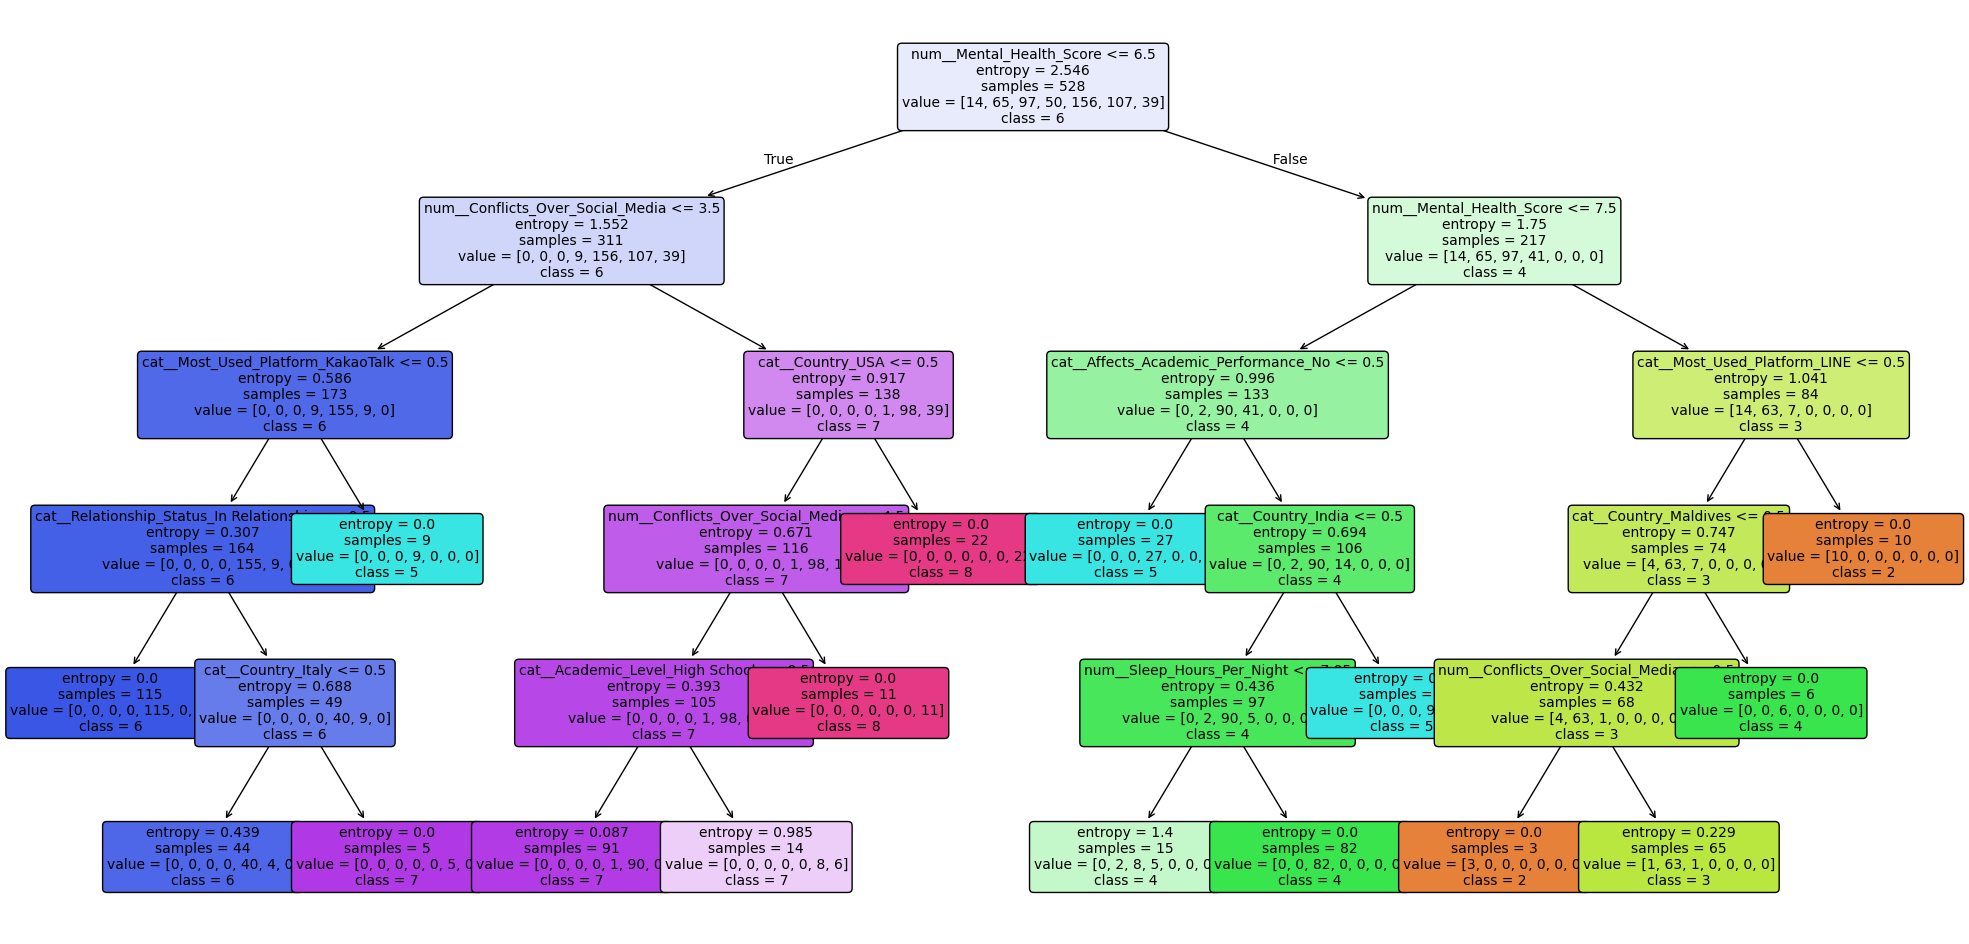

In [49]:
plt.figure(figsize=(25,12))
feature_names_processed = preprocessor.get_feature_names_out()
tree.plot_tree(
    treemodel,
    feature_names=feature_names_processed,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

In [50]:
#5.Used the learned model to prediction with the test set
y_pred = treemodel.predict(X_test_processed)
y_pred

array([5, 7, 5, 7, 4, 9, 3, 4, 5, 7, 8, 8, 9, 7, 4, 5, 5, 7, 7, 8, 5, 8,
       8, 9, 4, 5, 7, 7, 5, 7, 8, 7, 7, 6, 8, 7, 7, 7, 7, 5, 8, 5, 7, 7,
       8, 5, 9, 6, 5, 7, 7, 6, 4, 5, 7, 8, 6, 7, 8, 9, 4, 5, 6, 7, 6, 5,
       8, 5, 8, 8, 7, 7, 5, 5, 4, 7, 5, 9, 7, 7, 7, 5, 8, 9, 8, 5, 7, 5,
       8, 6, 5, 9, 8, 7, 4, 8, 5, 5, 7, 4, 5, 3, 5, 7, 5, 5, 8, 5, 8, 5,
       7, 5, 5, 7, 8, 5, 8, 4, 4, 8, 7, 7, 8, 7, 7, 7, 8, 4, 3, 6, 8, 8,
       4, 7, 7, 8, 4, 7, 8, 4, 5, 5, 8, 8, 9, 4, 6, 8, 5, 7, 7, 8, 9, 8,
       5, 7, 9, 5, 7, 9, 7, 7, 7, 7, 8, 8, 7, 5, 7, 5, 9, 8, 7, 7, 9, 4,
       7])

In [51]:
#6. Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test_dtree, y_pred))
print("\nClassification Report:\n", classification_report(y_test_dtree, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_dtree, y_pred))

# 6. Feature Importance
import numpy as np
importances = treemodel.feature_importances_
feature_names_processed = preprocessor.get_feature_names_out() # Redefine for robustness in case cell above is skipped
sorted_idx = np.argsort(importances)[::-1]

print("\nFeature Importance Ranking:")
for idx in sorted_idx:
    print(f"{feature_names_processed[idx]}: {importances[idx]}")

Accuracy: 0.96045197740113

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       1.00      0.94      0.97        18
           5       0.95      1.00      0.97        39
           6       1.00      0.82      0.90        11
           7       0.96      1.00      0.98        53
           8       0.95      0.97      0.96        37
           9       1.00      0.88      0.93        16

    accuracy                           0.96       177
   macro avg       0.82      0.83      0.82       177
weighted avg       0.96      0.96      0.96       177

Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0 17  1  0  0  0  0]
 [ 0  0  0 39  0  0  0  0]
 [ 0  0  0  1  9  1  0  0]
 [ 0  0  0  0  0 53  0  0]
 [ 0  0  0  0  0  1 36  0]
 [ 0  0  0  0  0  0  2 14]]

Feature Importance Ranking:
num__Mental_Health_Score: 0.5062

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

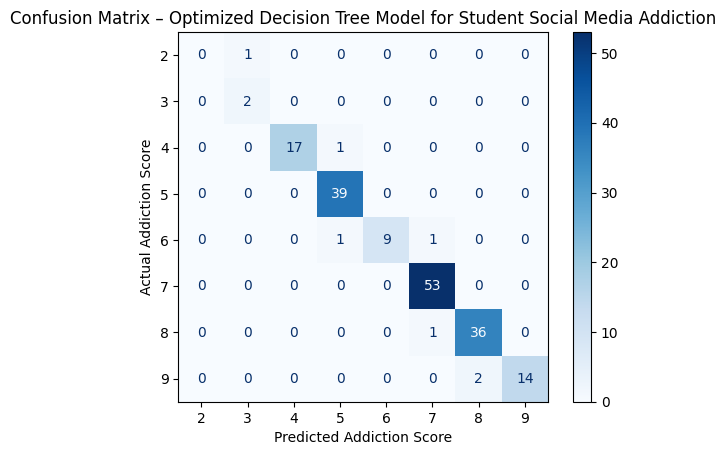

Columns in Dataset: ['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']
Dataset shape: (705, 13)


In [52]:
#7. Confusion matrix Visualisation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_dtree, y_pred)
labels = [str(x) for x in sorted(y.unique())]
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix – Optimized Decision Tree Model for Student Social Media Addiction")
plt.xlabel("Predicted Addiction Score")
plt.ylabel("Actual Addiction Score")
plt.show()

print("Columns in Dataset:", df.columns.tolist())
print("Dataset shape:", df.shape)

In [53]:
#Decision tree optimization
depth_options = [3, 5, 7, None]     # None = unlimited depth
criteria = ["gini", "entropy"]

tuning_results = []

for depth in depth_options:
    for crit in criteria:
        model_t = DecisionTreeClassifier(
            max_depth=depth,
            criterion=crit,
            random_state=42
        )
        model_t.fit(X_train_processed, y_train_dtree)
        preds_t = model_t.predict(X_test_processed)
        acc = accuracy_score(y_test_dtree, preds_t)

        tuning_results.append((depth, crit, acc))

print("\n=== Decision Tree Optimization Results ===")
for depth, crit, acc in tuning_results:
    print(f"Depth={depth}, Criterion={crit}, Accuracy={acc:.4f}")


=== Decision Tree Optimization Results ===
Depth=3, Criterion=gini, Accuracy=0.9153
Depth=3, Criterion=entropy, Accuracy=0.9153
Depth=5, Criterion=gini, Accuracy=0.9492
Depth=5, Criterion=entropy, Accuracy=0.9605
Depth=7, Criterion=gini, Accuracy=0.9379
Depth=7, Criterion=entropy, Accuracy=0.9548
Depth=None, Criterion=gini, Accuracy=0.9379
Depth=None, Criterion=entropy, Accuracy=0.9492


In [38]:
#pickle the file
from sklearn.pipeline import Pipeline
import pickle


In [39]:
model = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])





In [59]:
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train_pipe, y_train_pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [60]:
y_pred = treemodel.predict(X_test_processed)
y_pred

array([5, 7, 5, 7, 4, 9, 3, 4, 5, 7, 8, 8, 9, 7, 4, 5, 5, 7, 7, 8, 5, 8,
       8, 9, 4, 5, 7, 7, 5, 7, 8, 7, 7, 6, 8, 7, 7, 7, 7, 5, 8, 5, 7, 7,
       8, 5, 9, 6, 5, 7, 7, 6, 4, 5, 7, 8, 6, 7, 8, 9, 4, 5, 6, 7, 6, 5,
       8, 5, 8, 8, 7, 7, 5, 5, 4, 7, 5, 9, 7, 7, 7, 5, 8, 9, 8, 5, 7, 5,
       8, 6, 5, 9, 8, 7, 4, 8, 5, 5, 7, 4, 5, 3, 5, 7, 5, 5, 8, 5, 8, 5,
       7, 5, 5, 7, 8, 5, 8, 4, 4, 8, 7, 7, 8, 7, 7, 7, 8, 4, 3, 6, 8, 8,
       4, 7, 7, 8, 4, 7, 8, 4, 5, 5, 8, 8, 9, 4, 6, 8, 5, 7, 7, 8, 9, 8,
       5, 7, 9, 5, 7, 9, 7, 7, 7, 7, 8, 8, 7, 5, 7, 5, 9, 8, 7, 7, 9, 4,
       7])

In [58]:
with open("addiction_model.pkl", "wb") as file:
    pickle.dump(pipeline, file)
